In [1]:
import pickle
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score

# Carico le serie temporali

In [2]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly3 = pickle.load(handle)
print(allPixelNDVIPoly3.shape) #fix duplicate plot

with open('./pickles/allPixelNDVIPoly4.pickle', 'rb') as handle:
    allPixelNDVIPoly4 = pickle.load(handle)
print(allPixelNDVIPoly4.shape) #fix duplicate plot

with open('./pickles/allPixelNDVIPoly6.pickle', 'rb') as handle:
    allPixelNDVIPoly6 = pickle.load(handle)
print(allPixelNDVIPoly6.shape) #fix duplicate plot

(1579, 150)
(1234, 150)
(1819, 150)


# Carico le rese

In [3]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)
print(newResa3.shape) #fix duplicate plot

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)
print(newResa4.shape) #fix duplicate plot

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)
print(newResa6.shape) #fix duplicate plot

(1579,)
(1234,)
(1819,)


# Pulisco le rese

In [4]:
allPixelNDVIPoly3 = allPixelNDVIPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
print(len(newResa3))

allPixelNDVIPoly4 = allPixelNDVIPoly4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
print(len(newResa4))

allPixelNDVIPoly6 = allPixelNDVIPoly6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]
print(len(newResa6))

1471
1065
1700


# Cerchiamo il numero K migliore per la nostra operazione di clustering

In [5]:
distortions3 = []
distortions4 = []
distortions6 = []

for i in range(1,11):
    km3 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    km4 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    km6 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    km3.fit(allPixelNDVIPoly3)
    distortions3.append(km3.inertia_)
    km4.fit(allPixelNDVIPoly4)
    distortions4.append(km4.inertia_)
    km6.fit(allPixelNDVIPoly6)
    distortions6.append(km6.inertia_)

# Stampo il grafico

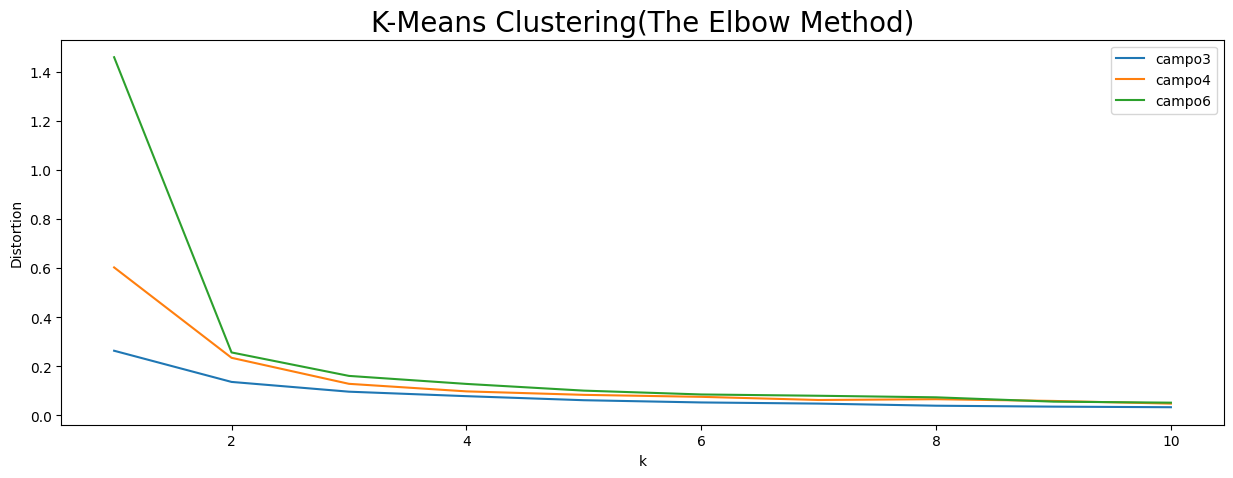

In [6]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions3,label='campo3')
plt.plot(range(1, 11), distortions4,label='campo4')
plt.plot(range(1, 11), distortions6,label='campo6')
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.legend()
plt.show()

# Stampo la silhoutte migliore

In [7]:
silhoutte3 = [0]
silhoutte4 = [0]
silhoutte6 = [0]

for i in range(2,11):
    kms_3 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    kms_4 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    kms_6 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    silhoutte3.append(silhouette_score(allPixelNDVIPoly3,kms_3.fit_predict(allPixelNDVIPoly3),metric="euclidean"))
    silhoutte4.append(silhouette_score(allPixelNDVIPoly4,kms_4.fit_predict(allPixelNDVIPoly4),metric="euclidean"))
    silhoutte6.append(silhouette_score(allPixelNDVIPoly6,kms_6.fit_predict(allPixelNDVIPoly6),metric="euclidean"))

# Stampo il grafico

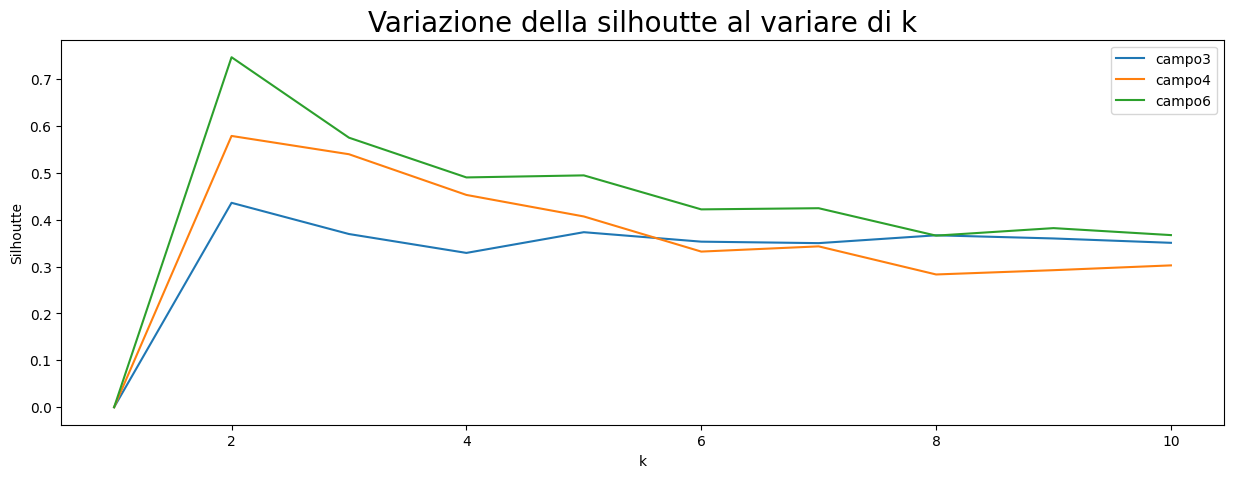

In [8]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), silhoutte3,label='campo3')
plt.plot(range(1, 11), silhoutte4,label='campo4')
plt.plot(range(1, 11), silhoutte6,label='campo6')
plt.title('Variazione della silhoutte al variare di k', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Silhoutte')
plt.legend()
plt.show()